In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='./dataset/'

In [3]:
train=pd.read_csv(path+'train_FD001.txt',parse_dates=False, delimiter=" ", decimal=".", header=None)

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
test=pd.read_csv(path+'test_FD001.txt',parse_dates=False,delimiter=" ",decimal=".",header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [6]:
RUL=pd.read_csv(path+'RUL_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)
RUL.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


# 统计值缺失情况

In [7]:
table_NaN = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1)
table_NaN.columns = ['train', 'test']
table_NaN

,train,test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## 清理无效的列并重命名

In [8]:
#清理无用列
train.drop(train.columns[[-1,-2]], axis=1, inplace=True)
test.drop(test.columns[[-1,-2]], axis=1, inplace=True)
RUL.drop(RUL.columns[[-1,-1]], axis=1, inplace=True)
#命名表头
cols = ['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 
        's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
train.columns = cols
test.columns = cols

In [9]:
train.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
train.tail()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


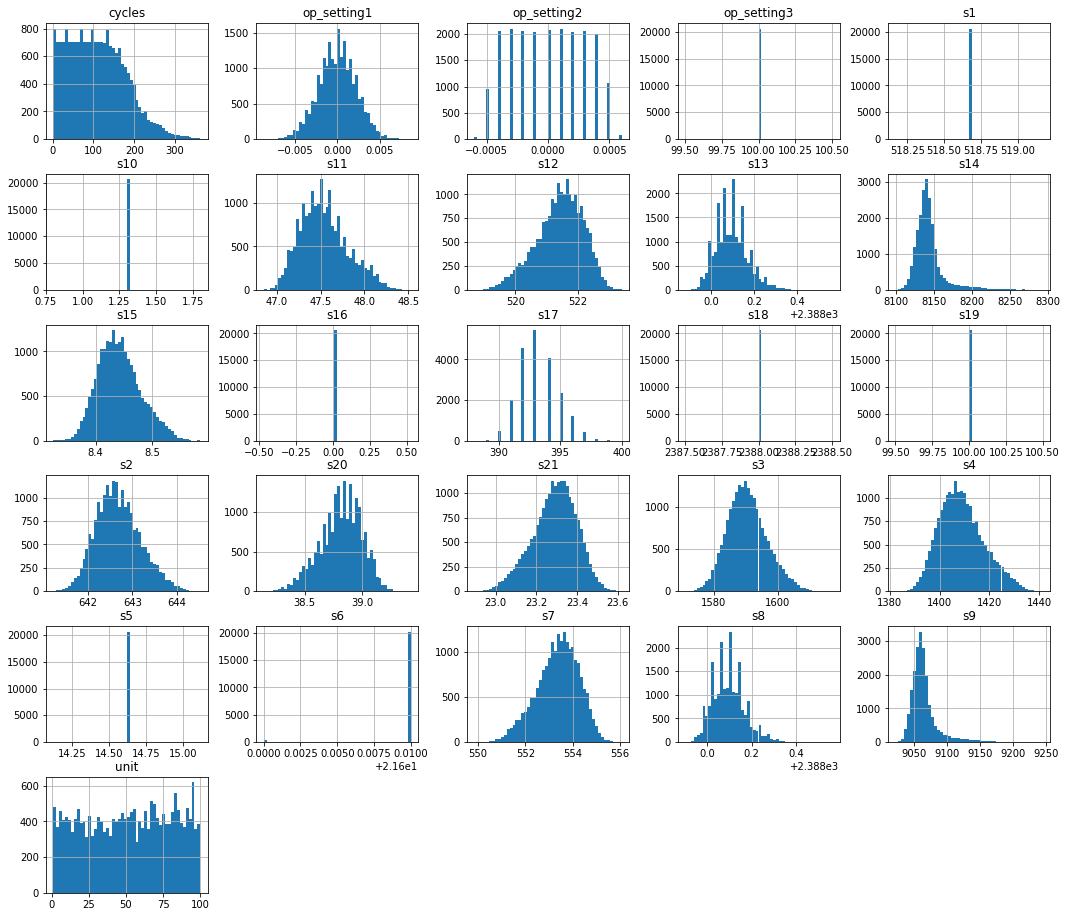

In [11]:
train.hist(bins=50, figsize=(18,16))
plt.show()

In [ ]:
values = train[train.unit==1].values
groups = [x for x in range(5,26)]
i = 1
plt.figure(figsize=(15,60))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(train.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

# 发现大部分传感器都有下降或上升的趋势

# 接下来看看同样的传感器，在不同的引擎上的表现。

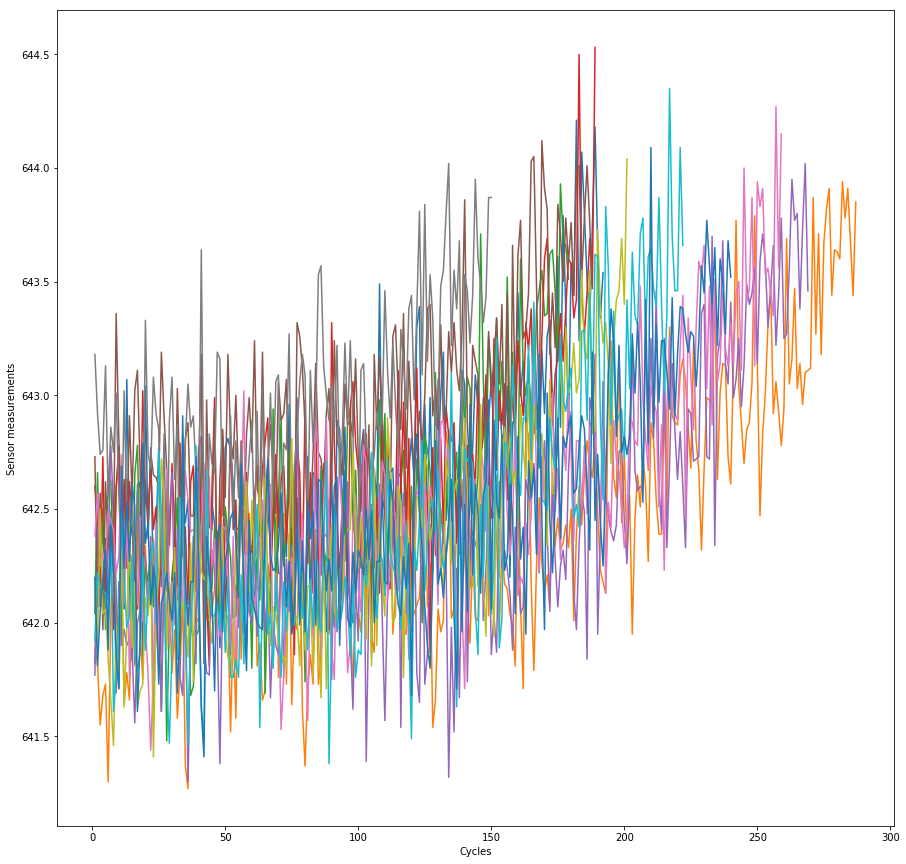

In [ ]:
plt.figure(figsize = (15, 15))
plt.plot(train[train.unit==1].cycles, train[train.unit==1].s2)
plt.plot(train[train.unit==2].cycles, train[train.unit==2].s2)
plt.plot(train[train.unit==3].cycles, train[train.unit==3].s2)
plt.plot(train[train.unit==4].cycles, train[train.unit==4].s2)
plt.plot(train[train.unit==5].cycles, train[train.unit==5].s2)
plt.plot(train[train.unit==6].cycles, train[train.unit==6].s2)
plt.plot(train[train.unit==7].cycles, train[train.unit==7].s2)
plt.plot(train[train.unit==8].cycles, train[train.unit==8].s2)
plt.plot(train[train.unit==9].cycles, train[train.unit==9].s2)
plt.plot(train[train.unit==10].cycles, train[train.unit==10].s2)
plt.plot(train[train.unit==11].cycles, train[train.unit==11].s2)
plt.xlabel('Cycles')
plt.ylabel('Sensor measurements') 
plt.show()

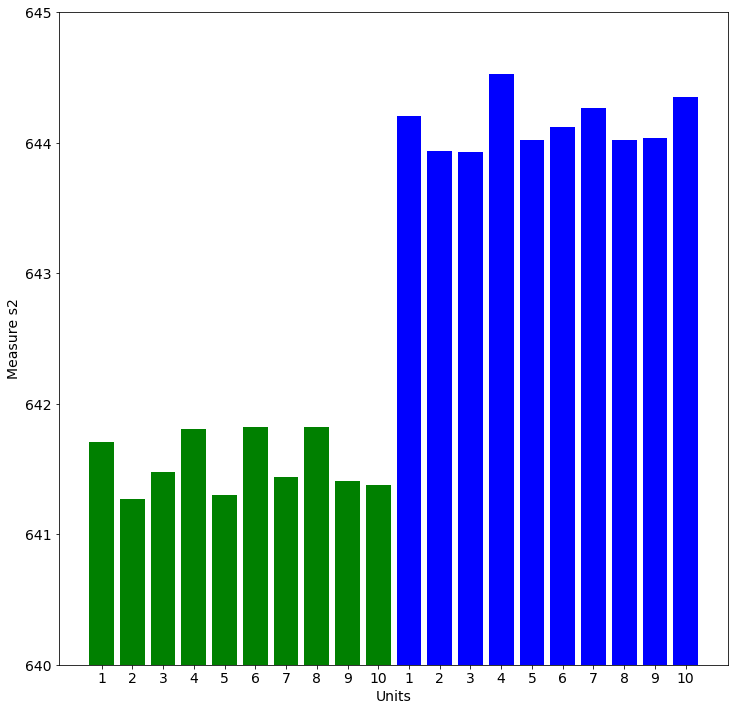

In [ ]:
minb = train.groupby('unit', as_index=False).min().head(10)
maxb = train.groupby('unit', as_index=False).max().head(10)
mmtable = minb.append(maxb, ignore_index=True)
plt.figure(figsize = (12,12))
col = np.concatenate((np.repeat('green', 10), np.repeat('blue', 10)), axis=0)
bar_labels = list(mmtable['unit'])
x_pos = list(range(len(bar_labels)))
bars = plt.bar(x_pos, mmtable['s2'], color=col)
plt.ylim([640, 645])
plt.xlabel('Units', fontsize=14)
plt.ylabel('Measure s2', fontsize=14)
plt.xticks(x_pos, bar_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 按引擎分组，计算每种引擎的最大生命周期，以maxcycle-cycle作为该样本的RUL指标

In [ ]:
train = pd.merge(train, train.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')
train.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)

In [ ]:
train['RUL'] = train['maxcycles'] - train['cycles']


# 数据归一化处理

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [ ]:
train.iloc[:,2:26] = scaler.fit_transform(train.iloc[:,2:26])
train.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,maxcycles,RUL
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,192,191
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,192,190
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,192,189
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,192,188
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,192,187


In [ ]:
test.iloc[:,2:26] = scaler.fit_transform(test.iloc[:,2:26])
test.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.65625,0.692308,0.0,0.0,0.596215,0.421968,0.282214,0.0,...,0.534247,0.325581,0.152259,0.347076,0.0,0.375,0.0,0.0,0.500000,0.620099
1,1,2,0.34375,0.230769,0.0,0.0,0.182965,0.504025,0.225240,0.0,...,0.634703,0.395349,0.277907,0.227709,0.0,0.500,0.0,0.0,0.645455,0.645718
2,1,3,0.53125,0.538462,0.0,0.0,0.419558,0.464814,0.346130,0.0,...,0.591324,0.325581,0.192892,0.533557,0.0,0.500,0.0,0.0,0.700000,0.681104
3,1,4,0.77500,0.461538,0.0,0.0,0.413249,0.391587,0.449867,0.0,...,0.456621,0.372093,0.217896,0.282359,0.0,0.250,0.0,0.0,0.627273,0.620382
4,1,5,0.60000,0.461538,0.0,0.0,0.435331,0.471306,0.357974,0.0,...,0.632420,0.325581,0.187891,0.337009,0.0,0.125,0.0,0.0,0.618182,0.676008


# 随机按引擎编号2-8划分训练集和验证集

In [ ]:
np.random.seed(111)
permute_ids = np.random.permutation(train.unit.unique())
train_ids = permute_ids[0:80]
dev_ids = permute_ids[80:]
train_data = train[train.unit.isin(train_ids)]
dev_data = train[train.unit.isin(dev_ids)]

In [ ]:
train_data.drop(['maxcycles'],axis=1, inplace=True)
train_data.head()

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187


In [ ]:
dev_data.drop(['maxcycles'],axis=1, inplace=True)
dev_data.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
1563,8,1,0.350575,0.250000,0.0,0.0,0.593373,0.308044,0.464213,0.0,...,0.367647,0.121426,0.599846,0.0,0.416667,0.0,0.0,0.589147,0.624965,149
1564,8,2,0.431034,0.250000,0.0,0.0,0.515060,0.325485,0.482107,0.0,...,0.367647,0.104448,0.369373,0.0,0.333333,0.0,0.0,0.589147,0.550124,148
1565,8,3,0.505747,0.666667,0.0,0.0,0.460843,0.437541,0.355165,0.0,...,0.352941,0.115337,0.480185,0.0,0.416667,0.0,0.0,0.573643,0.396299,147
1566,8,4,0.379310,0.916667,0.0,0.0,0.466867,0.461740,0.402768,0.0,...,0.352941,0.123129,0.444786,0.0,0.416667,0.0,0.0,0.558140,0.473488,146
1567,8,5,0.247126,0.750000,0.0,0.0,0.578313,0.546545,0.457292,0.0,...,0.397059,0.093973,0.300115,0.0,0.333333,0.0,0.0,0.573643,0.556890,145


# 定义CNN神经网络

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(14, 24, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.05)))


model.add(Dense(1, activation='linear'))


构造序列特征，滑窗大小取14

In [ ]:
def build_xy(df,history_len,step, feature_columns,label_column='RUL'):
    ids = df.unit.unique()
    x = []
    y = []
    for idx in ids:
        df_x = df[df.unit==idx]
        start = history_len 
        end = df_x.shape[0]-1 
        if end <start:
            continue
        features = df_x[feature_columns].values
        labels = df_x[label_column].values
        
        while(start < end):
            x.append(features[start-history_len:start])
            y.append(labels[start-1])
            start += step
    return np.expand_dims(np.array(x),axis=-1), np.array(y)

In [ ]:
feature_columns = set(dev_data.columns)-{'unit','cycles','RUL'}
history_length = 14
step = 2
train_x,train_y = build_xy(train_data,history_length,step,feature_columns)
dev_x,dev_y = build_xy(dev_data,history_length,step,feature_columns)

In [ ]:
import tensorflow as tf
model.compile(loss='mse', optimizer='adam')
checkpointer = ModelCheckpoint(filepath="checkpoints/best_weights_cnn.hdf5",monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(train_x, train_y, batch_size=256, epochs=50,validation_data=(dev_x,dev_y),callbacks=[checkpointer])

Train on 7703 samples, validate on 1887 samples
Epoch 1/50
7680/7703 [============================>.] - ETA: 0s - loss: 8726.5693
Epoch 00001: val_loss improved from inf to 3836.15630, saving model to checkpoints/best_weights_cnn.hdf5
7703/7703 [==============================] - 7s 916us/sample - loss: 8713.1095 - val_loss: 3836.1563
Epoch 2/50
7680/7703 [============================>.] - ETA: 0s - loss: 4289.7185
Epoch 00002: val_loss improved from 3836.15630 to 3447.08272, saving model to checkpoints/best_weights_cnn.hdf5
7703/7703 [==============================] - 6s 798us/sample - loss: 4287.7929 - val_loss: 3447.0827
Epoch 3/50
7680/7703 [============================>.] - ETA: 0s - loss: 3740.6142
Epoch 00003: val_loss improved from 3447.08272 to 3026.23030, saving model to checkpoints/best_weights_cnn.hdf5
7703/7703 [==============================] - 6s 734us/sample - loss: 3743.4758 - val_loss: 3026.2303
Epoch 4/50
7680/7703 [============================>.] - ETA: 0s - loss: 30

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss,label='val_loss')
plt.legend()

查看预测结果

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('checkpoints/best_weights_cnn.hdf5')
prediction = model.predict(dev_x)

In [ ]:
sample_pred_start = 200
sample_pred_end = 350
plt.scatter(range(0,sample_pred_end-sample_pred_start),dev_y[sample_pred_start:sample_pred_end], label='true')
plt.scatter(range(0,sample_pred_end-sample_pred_start),prediction[sample_pred_start:sample_pred_end],label='prediction')
plt.legend()

In [ ]:
#sample_pred_start = 200
#sample_pred_end = 350
plt.plot(dev_y, label='true')
plt.plot(prediction,label='prediction')
plt.legend()

In [ ]:
def build_x(df,history_len,feature_columns):
    ids = df.unit.unique()
    x = []
    for idx in ids:
        df_x = df[df.unit==idx]
        start = history_len 
        end = df_x.shape[0]-1 
        features = df_x[feature_columns].values
        x.append(features[end+1-history_len:])
    return np.expand_dims(np.array(x),axis=-1)

In [ ]:
test_x = build_x(test,14,feature_columns)

In [ ]:
test_x.shape

In [ ]:
prediction_RUL = model.predict(test_x)

In [ ]:

plt.scatter([x for x in range(100)],RUL,label='true')
plt.scatter([x for x in range(100)],prediction_RUL,label='prediction')
plt.legend()

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(RUL,label='true')
plt.plot(prediction_RUL,label='prediction')
plt.legend()